<b> Name: Ajay Kumar <br>
    Hamoye ID: 147bffea7681f000 </b>

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling
import xgboost as xgb
import lightgbm as lgb
import sklearn.utils

# Loading of Data

In [2]:
grid_data= pd.read_csv('Data_for_UCI_named.csv') # loading data

In [3]:
grid_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


<b> Description of Data Set </b> <br>
It has 12 primary predictive features and two dependent variables. <br>
 <b> Predictive features: </b> <br>
 1.	'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes). <br>
 2.	'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4). <br>
 3.	'g1' to 'g4': price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma'). <br>

<b> Dependent Variables: </b> <br>
1.	'stab': the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable). <br>
2.	'stabf': a categorical (binary) label ('stable' or 'unstable'). <br>

Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification).


In [4]:
grid_data.shape # size of data set

(10000, 14)

In [5]:
grid_data.describe() # Statistical data 

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [6]:
grid_data.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

<b>There are no null values found.</b>

In [7]:
grid_data.duplicated().sum()

0

<b> No duplicate records. </b>

In [8]:
grid_data.stabf.value_counts() # Checking distrubution of classes in data set.

unstable    6380
stable      3620
Name: stabf, dtype: int64

<b> unstable </b> class records is nearly twice of <b> stable </b> class.

In [9]:
from pandas_profiling import ProfileReport
prof = ProfileReport(grid_data)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<b> Complete data exploratory analysis of data set can be seen in output.html file. </b>

In [10]:
#Dropping the 'stab' column
data_features = grid_data.drop(['stab', 'stabf'], axis = 1)
data_target = grid_data['stabf']

# Modeling

In [11]:
#Importing classification libraries
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

In [12]:
# Splitting Data set
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, test_size=0.2, random_state=1)

In [13]:
#Feature scaling of  dataset with standard scaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

<b> Following metrics are calculated in scikit-learn’s classification report: </b> <br>

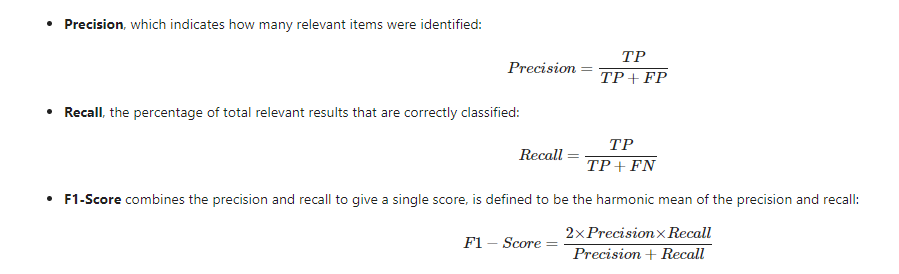

## 1. Random Forest

In [14]:
# Random Forest Classifier
random_forest = RandomForestClassifier(random_state=1)
 
# Fitting of model
random_forest.fit(X_train, y_train)
 
# Predicting
y_test_predictions = random_forest.predict(X_test)

<b> Confusion matrix for Random Forest Classifier: </b> 

In [15]:
from sklearn.metrics import confusion_matrix

CM_RFC= confusion_matrix(y_true= y_test, y_pred= y_test_predictions , labels= ['stable', 'unstable'])

CM_RFC

array([[ 625,   87],
       [  55, 1233]], dtype=int64)

## Question 14 

<b> Classification Report to find metrics for Random Forest Classifier: </b>

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predictions , digits= 4))

              precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



<b> Accuracy of Random Forest classifier is 0.9290 </b>

## 2. Xtreme Gradient Boosting (XGBoost)

In [17]:
#Defining parameters
parameters= {'max_depth': 3, 'eta': 0.3, 'objective': 'multi:softprob',
       'num_class': 2}
steps= 20

In [18]:
# instantiating XGBoost Classifier and fitting model

xgboost_clas = xgb.XGBClassifier(param= parameters, random_state= 1)
xgboost_clas.fit(X_train, y_train)

[21:22:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:22:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1,
              param={'eta': 0.3, 'max_depth': 3, 'num_class': 2,
                     'objective': 'multi:softprob'},
              predictor='auto', random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<b> Confusion matrix for XGBoosting: </b>

In [19]:
xgboost_pred= xgboost_clas.predict(X_test)

cm_xgb= confusion_matrix(y_true= y_test, y_pred= xgboost_pred, labels= ['stable', 'unstable'])
cm_xgb

array([[ 648,   64],
       [  45, 1243]], dtype=int64)

## Question 06

<b> Classification Report to find metrics for XGBoosting: </b>

In [20]:
print(classification_report(y_test, xgboost_pred, digits= 4))

              precision    recall  f1-score   support

      stable     0.9351    0.9101    0.9224       712
    unstable     0.9510    0.9651    0.9580      1288

    accuracy                         0.9455      2000
   macro avg     0.9430    0.9376    0.9402      2000
weighted avg     0.9453    0.9455    0.9453      2000



<b> Accuracy of XGBoost classifier is 0.9455 </b>

## 3. LightGBM

In [21]:
# Fitting the model
lgbm_clas= lgb.LGBMClassifier(random_state= 1)
lgbm_clas.fit(X_train, y_train)
lgbm_pred = lgbm_clas.predict(X_test)

<b> Confusion matrix for LGBM: </b>

In [22]:
cm_lgbm= confusion_matrix(y_true= y_test, y_pred= lgbm_pred, labels= ['stable', 'unstable'])

cm_lgbm

array([[ 641,   71],
       [  50, 1238]], dtype=int64)

## Question 08

<B> Classification Report to find metrics for LGBM: </B>

In [23]:
print(classification_report(y_test, lgbm_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9276    0.9003    0.9138       712
    unstable     0.9458    0.9612    0.9534      1288

    accuracy                         0.9395      2000
   macro avg     0.9367    0.9307    0.9336      2000
weighted avg     0.9393    0.9395    0.9393      2000



<b> Accuracy of LGBM classifier is 0.9395 </b>

## 4. Extra Tree Classification

In [24]:
#Extra Trees Classifier () function and fitting the model

ET_clas= ExtraTreesClassifier(random_state= 1)
ET_clas.fit(X_train, y_train)
ETC_pred= ET_clas.predict(X_test)

<b> Confusion matrix for Extra Tree Classification: </b>

In [25]:
cm_ETC= confusion_matrix(y_true= y_test, y_pred= ETC_pred, labels= ['stable', 'unstable'])

cm_ETC

array([[ 606,  106],
       [  38, 1250]], dtype=int64)

<b> Classification Report to find metrics for Extra Tree Classification: </b>

In [26]:
print(classification_report(y_test, ETC_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9410    0.8511    0.8938       712
    unstable     0.9218    0.9705    0.9455      1288

    accuracy                         0.9280      2000
   macro avg     0.9314    0.9108    0.9197      2000
weighted avg     0.9287    0.9280    0.9271      2000



# <EM> Randomized Search CV on Extra Trees Classifier (Tuning) </EM> 

In [27]:
from sklearn.model_selection import RandomizedSearchCV
# define parameters
ETC_parameters= {'n_estimators': [50, 100, 300, 500, 1000],
           'min_samples_leaf':[1, 2, 4, 6, 8],
           'min_samples_split': [2, 3, 5, 7, 9],
           'max_features': ['auto', 'sqrt', 'log2', None]}

In [28]:
# Intitialising Random search
ETC_rscv= RandomizedSearchCV(estimator= ET_clas, param_distributions= ETC_parameters,cv=5, n_iter=10, 
                             scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state= 1)

In [29]:
# fitting the model
ETC_rscv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, scoring='accuracy', verbose=1)

## Question 12

In [30]:
# Printing out the best parameter
ETC_rscv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [31]:
rscv_pred= ETC_rscv.predict(X_test)


<b> Confusion matrix for Random Search CV on ETC: </b>

In [32]:
cm_etc_rscv= confusion_matrix(y_true= y_test, y_pred= rscv_pred, labels= ['stable', 'unstable'])

cm_etc_rscv

array([[ 619,   93],
       [  53, 1235]], dtype=int64)

<b> Classification Report to find metrics for Random Search CV for Extra Tree Classifier: </b>

## Question 13

In [33]:
print(classification_report(y_test, rscv_pred, digits= 4))

              precision    recall  f1-score   support

      stable     0.9211    0.8694    0.8945       712
    unstable     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000



<b> Its has been observed that there is drop in accuracy of the Extra Tree Classifier model. Previously its was 0.9280 and now it is 0.9270 </b>

## Question 20

In [34]:
# determining the importance of the features
print(ET_clas.feature_importances_)

[0.11739736 0.11844468 0.11316851 0.11546569 0.03950675 0.04037132
 0.04070628 0.04057864 0.08978291 0.09367636 0.09688268 0.09401882]


<b>The most importanat feature is tau2, and the leas onet is p1. </b>